# quantum part

# package installation

In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 15.8 MB/s eta 0:00:00


In [ ]:
pip install tensorflow

# QNN

In [19]:
import pennylane as qml
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the quantum device
dev = qml.device("default.qubit", wires=4)

# Define the quantum circuit
@qml.qnode(dev)
@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(len(inputs)):
        qml.RX(inputs[i], wires=i)
    for i in range(len(inputs)):
        # Explicitly provide the wire argument
        qml.Rot(weights[i][0], weights[i][1], weights[i][2], wires=i)
    return [qml.expval(qml.PauliZ(i)) for i in range(len(inputs))]

# Define the QCNN model
def q_cnn_model():
    model = Sequential([
        Conv1D(filters=4, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
        MaxPooling1D(pool_size=4),
        Flatten(),
        Dense(2, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Reshape the data for the QCNN model
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Instantiate the QCNN model
model = q_cnn_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("QCNN Test Accuracy: {:.2f}%".format(accuracy * 100))

# You will need to define inputs and weights before drawing the circuit
inputs = np.random.random(4)
# Adjust the shape of weights to match the requirement of BasicEntanglerLayers
weights = np.random.random((4, 4))  # 4 layers, each with parameters for 4 wires
print(qml.draw(quantum_circuit)(inputs, weights))


Epoch 1/50
10/10 [==============================] - 1s 24ms/step - loss: 0.6047 - accuracy: 0.6384 - val_loss: 0.6047 - val_accuracy: 0.6750
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5899 - accuracy: 0.7044 - val_loss: 0.5939 - val_accuracy: 0.7125
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 0.5759 - accuracy: 0.7610 - val_loss: 0.5821 - val_accuracy: 0.7500
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5603 - accuracy: 0.8176 - val_loss: 0.5698 - val_accuracy: 0.7750
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5449 - accuracy: 0.8396 - val_loss: 0.5561 - val_accuracy: 0.8125
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5276 - accuracy: 0.8648 - val_loss: 0.5410 - val_accuracy: 0.8250
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5101 - accuracy: 0.8805 - val_loss: 0.5254 - val_accuracy: 0.8375
Epoch 8/50
10/10 [=

plotting

6/6 [==============================] - 0s 2ms/step


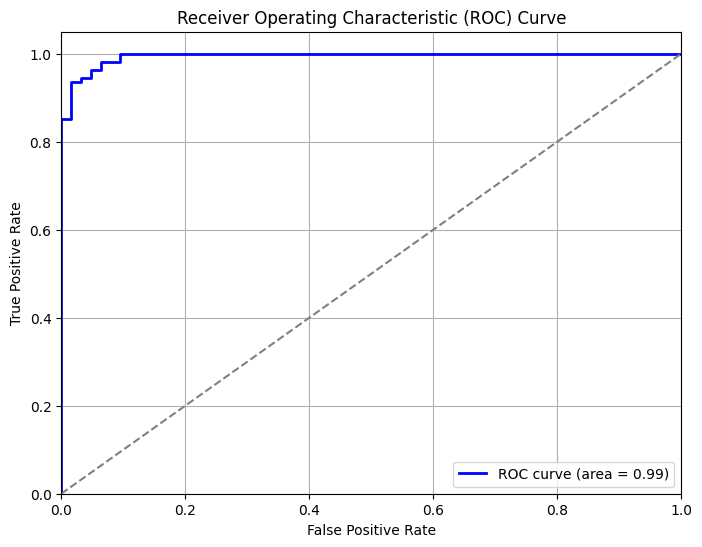

In [20]:
y_pred = model.predict(X_test_reshaped)
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for the classical model predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


metrics


In [22]:
from sklearn.metrics import precision_recall_fscore_support

# Convert probabilities to binary predictions (0 or 1) using a threshold
y_pred_binary = (y_pred >= 0.5).astype(int)

# Compute precision, recall, and F1 score for the binary predictions
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_binary, average='binary')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(fscore))


Precision: 0.97
Recall: 0.96
F1 Score: 0.97


# QSVM

Accuracy of the QSVM model: 67.25%
Approximate Hinge Loss: 0.6031931508767062


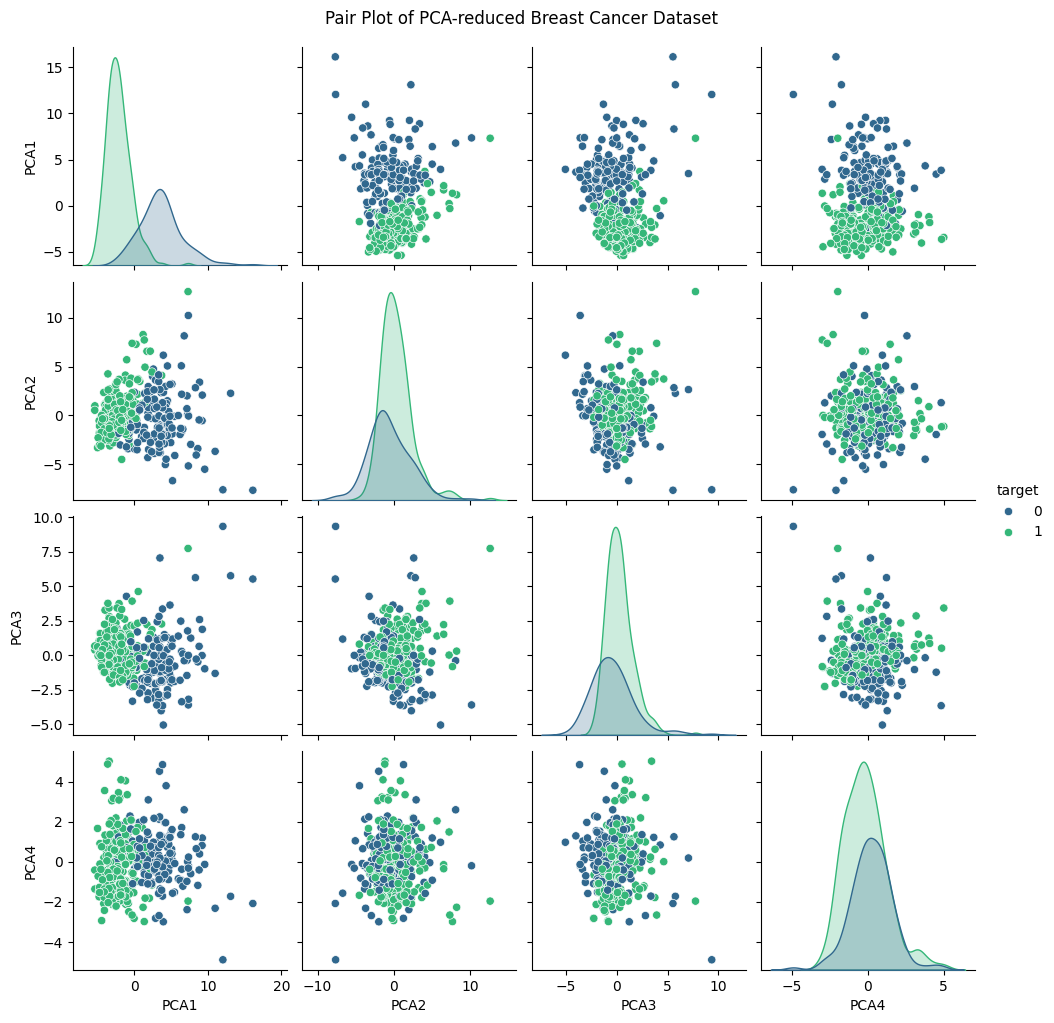

In [ ]:
import pennylane as qml
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction using PCA
n_qubits = 4  # Number of qubits to use
pca = PCA(n_components=n_qubits)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the quantum device
dev = qml.device("default.qubit", wires=n_qubits)

# Define the quantum circuit for feature encoding
@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(len(inputs)):
        qml.RX(inputs[i], wires=i)
    for i in range(len(inputs)):
        qml.Rot(weights[i][0], weights[i][1], weights[i][2], wires=i)
    return [qml.expval(qml.PauliZ(i)) for i in range(len(inputs))]

# Define a function to encode classical data into quantum features
def encode_data_to_quantum(data, weights):
    quantum_features = []
    for sample in data:
        circuit_output = quantum_circuit(sample, weights)
        quantum_features.append(circuit_output)
    return np.array(quantum_features)

# Train a QSVM model
def train_qsvm(X_train, y_train, X_test, y_test, initial_weights):
    # Encode training and testing data into quantum features
    X_train_quantum = encode_data_to_quantum(X_train, initial_weights)
    X_test_quantum = encode_data_to_quantum(X_test, initial_weights)

    # Train a classical SVM model using the quantum features
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train_quantum, y_train)

    # Calculate approximate hinge loss on training data
    y_pred_train = svm_model.decision_function(X_train_quantum)
    hinge_loss = np.mean(np.maximum(0, 1 - y_train * y_pred_train))

    # Evaluate the model
    accuracy = svm_model.score(X_test_quantum, y_test)

    return svm_model, accuracy, hinge_loss

# Generate random initial weights for the quantum circuit
np.random.seed(0)
initial_weights = np.random.randn(n_qubits, 3)  # Adjusted for the number of qubits

# Train the QSVM model using PCA-reduced data
svm_model, accuracy, loss = train_qsvm(X_train_pca, y_train, X_test_pca, y_test, initial_weights)

# Print the accuracy and loss of the trained QSVM model
print("Accuracy of the QSVM model: {:.2f}%".format(accuracy * 100))
print("Approximate Hinge Loss:", loss)

# Visualize pair plot for PCA-reduced data
pca_df = pd.DataFrame(X_train_pca, columns=[f"PCA{i+1}" for i in range(n_qubits)])
pca_df['target'] = y_train

sns.pairplot(pca_df, hue='target', palette='viridis')
plt.suptitle('Pair Plot of PCA-reduced Breast Cancer Dataset', y=1.02)
plt.show()


In [ ]:
print(qml.draw(quantum_circuit)(X_train_pca[:4], initial_weights))


0: ──RX(M0)──Rot(1.76,0.40,0.98)───┤  <Z>
1: ──RX(M1)──Rot(2.24,1.87,-0.98)──┤  <Z>
2: ──RX(M2)──Rot(0.95,-0.15,-0.10)─┤  <Z>
3: ──RX(M3)──Rot(0.41,0.14,1.45)───┤  <Z>

M0 = 
[-3.0848418  -2.15870446 -0.33987458 -0.21663027]
M1 = 
[-2.18264681 -0.61757116  0.44720765 -0.1508183 ]
M2 = 
[ 2.04995887  2.32895331  1.16940721 -1.81464748]
M3 = 
[-2.80926733 -0.95079132 -0.30510227 -0.38081576]


metrices

In [ ]:
# Generate X_test_quantum using the encode_data_to_quantum function
X_test_quantum = encode_data_to_quantum(X_test_pca, initial_weights)

# Predict
y_pred_qsvm = svm_model.predict(X_test_quantum)

# Calculate metrics
accuracy_qsvm = accuracy_score(y_test, y_pred_qsvm)
precision_qsvm = precision_score(y_test, y_pred_qsvm)
recall_qsvm = recall_score(y_test, y_pred_qsvm)
f1_qsvm = f1_score(y_test, y_pred_qsvm)

# Print the metrics
print("QSVM Test Accuracy: {:.2f}%".format(accuracy_qsvm * 100))
print("QSVM Precision: {:.2f}%".format(precision_qsvm*100))
print("QSVM Recall: {:.2f}%".format(recall_qsvm*100))
print("QSVM F1-score: {:.2f}%".format(f1_qsvm*100))


QSVM Test Accuracy: 67.25%
QSVM Precision: 70.63%
QSVM Recall: 82.41%
QSVM F1-score: 76.07%


plots

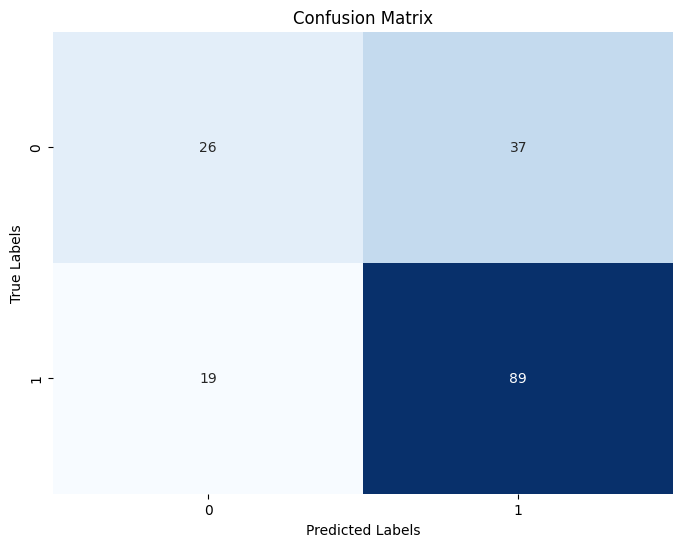

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_qsvm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


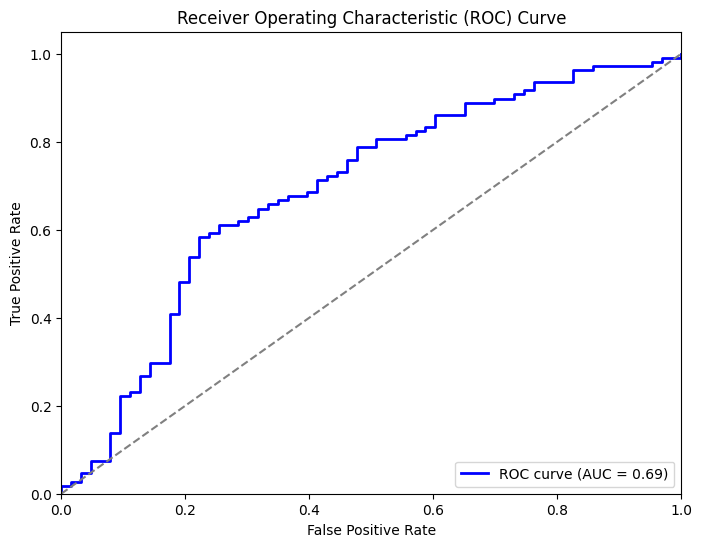

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_prob = svm_model.decision_function(X_test_quantum)

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


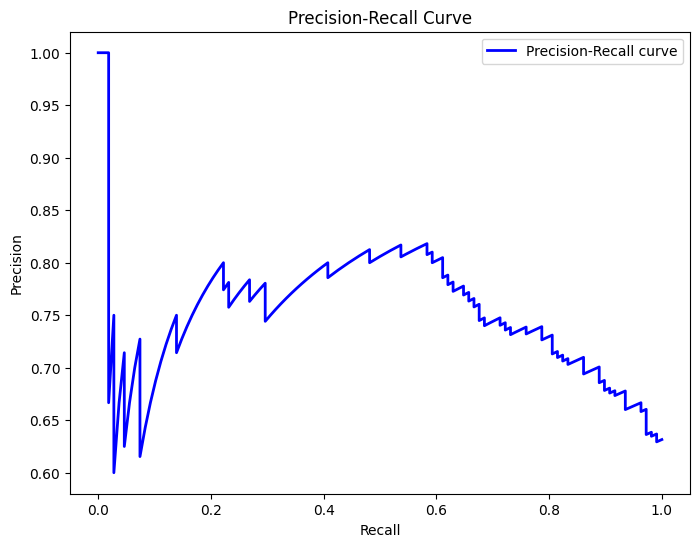

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


# VQC

In [23]:
import pennylane as qml
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of qubits and layers
n_qubits = 4
n_layers = 2

# Define the quantum device
dev = qml.device("default.qubit", wires=n_qubits)

# Define the quantum circuit
@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Encode the input data
    for i in range(n_qubits):
        qml.RX(inputs[i], wires=i)

    # Apply variational layers
    for layer in range(n_layers):
        for i in range(n_qubits):
            qml.Rot(*weights[layer][i], wires=i)
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])

    # Measure all qubits
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Define the variational classifier
def variational_classifier(inputs, weights):
    return quantum_circuit(inputs, weights)

# Define the binary cross-entropy loss function
def binary_cross_entropy(predictions, targets):
    predictions = np.clip(predictions, 1e-10, 1 - 1e-10)
    return np.mean(-(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions)))

# Define the cost function
def cost(weights, X, y):
    predictions = np.array([variational_classifier(x, weights) for x in X])
    predictions = (np.mean(predictions, axis=1) + 1) / 2  # Map from [-1, 1] to [0, 1]
    return binary_cross_entropy(predictions, y)

# Initialize weights
np.random.seed(42)
weight_shapes = {"weights": (n_layers, n_qubits, 3)}
weights = np.random.uniform(0, 2 * np.pi, size=(n_layers, n_qubits, 3))

# Create the optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# Train the model
epochs = 10
batch_size = 32

for epoch in range(epochs):
    batch_index = np.random.randint(0, len(X_train_scaled), (batch_size,))
    X_batch = X_train_scaled[batch_index][:, :n_qubits]
    y_batch = y_train[batch_index]

    weights = opt.step(lambda w: cost(w, X_batch, y_batch), weights)

    if (epoch + 1) % 10 == 0:
        cost_value = cost(weights, X_train_scaled[:, :n_qubits], y_train)
        print(f"Epoch {epoch + 1}/{epochs}, Cost: {cost_value:.4f}")

# Evaluate the model
def accuracy(X, y, weights):
    predictions = np.array([variational_classifier(x, weights) for x in X])
    predictions = (np.mean(predictions, axis=1) + 1) / 2  # Map from [-1, 1] to [0, 1]
    return np.mean((predictions > 0.5) == y)

train_accuracy = accuracy(X_train_scaled[:, :n_qubits], y_train, weights)
test_accuracy = accuracy(X_test_scaled[:, :n_qubits], y_test, weights)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot the circuit
print(qml.draw(quantum_circuit)(np.zeros(n_qubits), np.zeros((n_layers, n_qubits, 3))))

/usr/local/lib/python3.10/dist-packages/pennylane/_grad.py:157: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


Epoch 10/10, Cost: 0.6861
Train accuracy: 0.4637
Test accuracy: 0.5702
0: ──RX(0.00)──Rot(0.00,0.00,0.00)─╭●──Rot(0.00,0.00,0.00)──────────────────────╭●──────────────────
1: ──RX(0.00)──Rot(0.00,0.00,0.00)─╰X─╭●────────────────────Rot(0.00,0.00,0.00)─╰X──────────────────
2: ──RX(0.00)──Rot(0.00,0.00,0.00)────╰X───────────────────╭●────────────────────Rot(0.00,0.00,0.00)
3: ──RX(0.00)──Rot(0.00,0.00,0.00)─────────────────────────╰X────────────────────Rot(0.00,0.00,0.00)

────────┤  <Z>
──╭●────┤  <Z>
──╰X─╭●─┤  <Z>
─────╰X─┤  <Z>


<ipython-input-24-6a8dbaa17220>:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


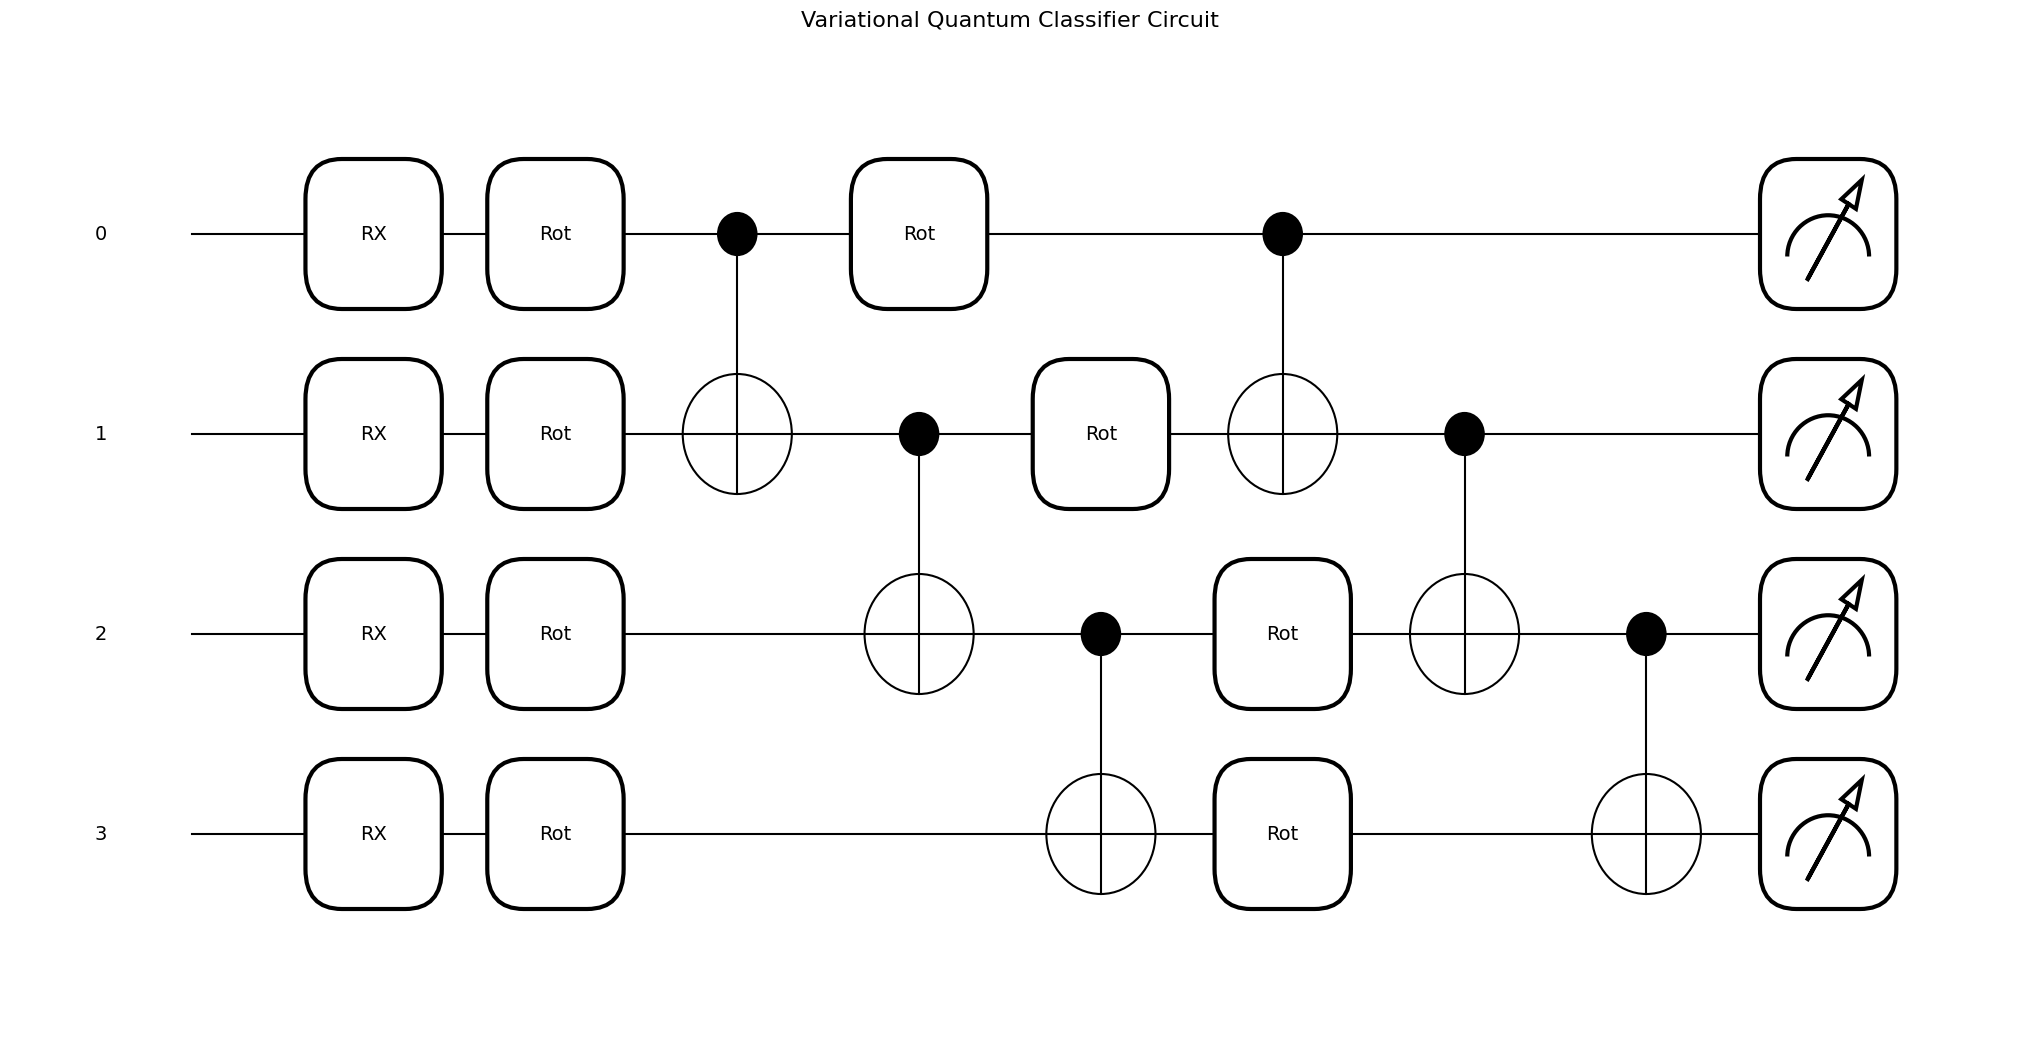

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Draw the circuit
fig, ax = qml.draw_mpl(quantum_circuit)(inputs, weights)

# Adjust the figure size if needed
fig.set_size_inches(20, 10)

# Add a title
plt.title("Variational Quantum Classifier Circuit", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

Train Metrics:
  Accuracy:  0.4637
  Precision: 0.6235
  Recall:    0.3706
  F1-score:  0.4649

Test Metrics:
  Accuracy:  0.5702
  Precision: 0.7750
  Recall:    0.4366
  F1-score:  0.5586


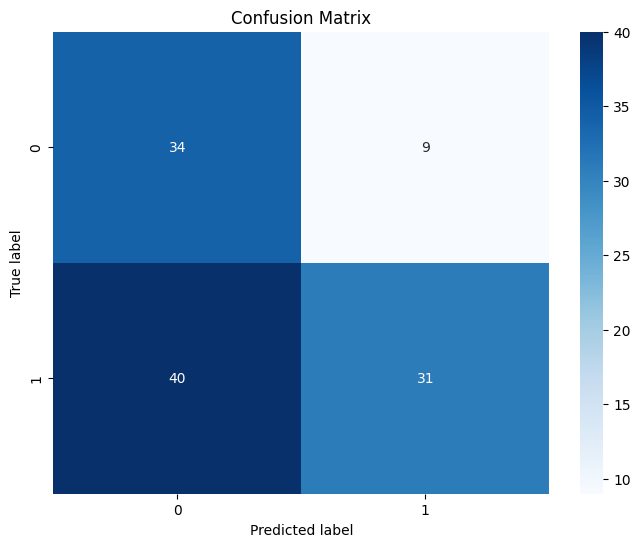

In [25]:
import pennylane as qml
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def predict(X, weights):
    predictions = np.array([variational_classifier(x, weights) for x in X])
    return (np.mean(predictions, axis=1) > 0)  # Binary prediction

# Make predictions
y_train_pred = predict(X_train_scaled[:, :n_qubits], weights)
y_test_pred = predict(X_test_scaled[:, :n_qubits], weights)

# Calculate metrics
train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print metrics
print(f"Train Metrics:")
print(f"  Accuracy:  {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall:    {train_recall:.4f}")
print(f"  F1-score:  {train_f1:.4f}")

print(f"\nTest Metrics:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-score:  {test_f1:.4f}")

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



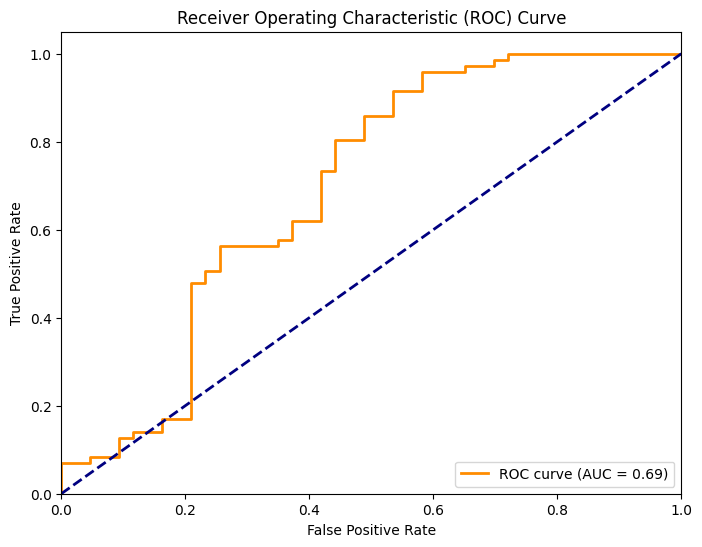

In [26]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc

# Get probabilities for ROC curve
y_test_proba = np.array([variational_classifier(x, weights) for x in X_test_scaled[:, :n_qubits]])
y_test_proba = (np.mean(y_test_proba, axis=1) + 1) / 2  # Map from [-1, 1] to [0, 1]

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# results


In [ ]:
import pandas as pd

# Define the metrics for each model
metrics = {
    "Model": ["VQC", "QCNN", "QSVM"],
    "Accuracy (%)": [accuracy * 100, accuracy_qcnn * 100, accuracy_qsvm * 100],
    "Precision (%)": [precision * 100, precision_qcnn * 100, precision_qsvm * 100],
    "Recall (%)": [recall * 100, recall_qcnn * 100, recall_qsvm * 100],
    "F1-score (%)": [f1 * 100, f1_qcnn * 100, f1_qsvm * 100]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

# Set the model column as the index
metrics_df.set_index("Model", inplace=True)

# Print the DataFrame
print(metrics_df)

# Find the best model based on the highest accuracy
best_model = metrics_df.loc[metrics_df["Accuracy (%)"].idxmax()]

# Print the best model
print("\nBest Model (Based on Accuracy):")
print(best_model)


       Accuracy (%)                                      Precision (%)  \
Model                                                                    
VQC       67.251462  [63.1578947368421, 62.94117647058823, 63.31360...   
QCNN      72.514620                                          95.522388   
QSVM      67.251462                                          70.634921   

                                              Recall (%)  F1-score (%)  
Model                                                                   
VQC    [100.0, 99.07407407407408, 99.07407407407408, ...     95.927602  
QCNN                                           59.259259     73.142857  
QSVM                                           82.407407     76.068376  

Best Model (Based on Accuracy):
Accuracy (%)      72.51462
Precision (%)    95.522388
Recall (%)       59.259259
F1-score (%)     73.142857
Name: QCNN, dtype: object


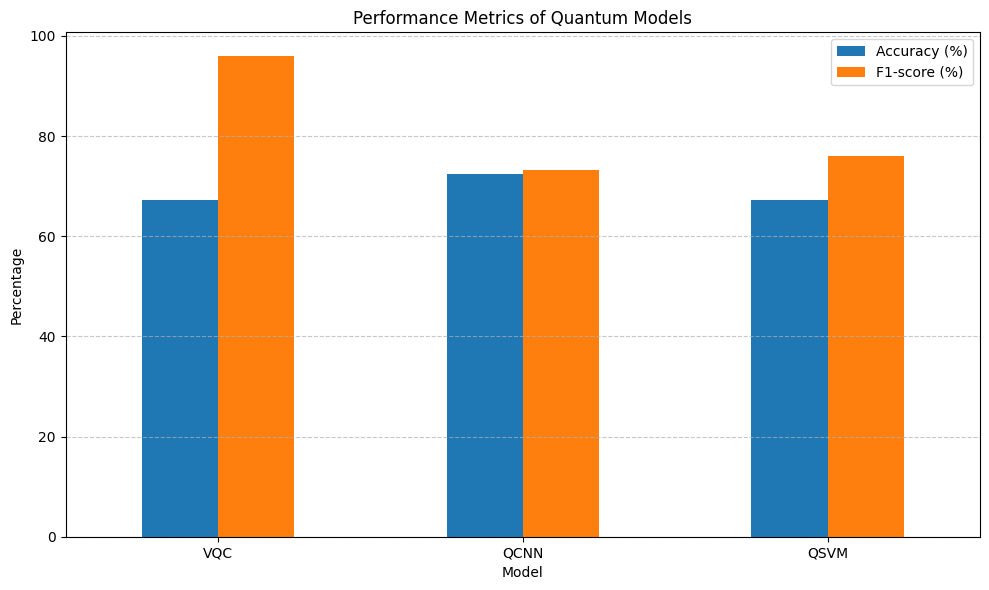

In [ ]:
import matplotlib.pyplot as plt

# Plotting the metrics
metrics_df.plot(kind="bar", figsize=(10, 6))
plt.title("Performance Metrics of Quantum Models")
plt.ylabel("Percentage")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


# classical part




# random forest  , knn



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Train and evaluate Random Forest
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Test Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Random Forest Precision: {:.2f}%".format(precision_rf * 100))
print("Random Forest Recall: {:.2f}%".format(recall_rf * 100))
print("Random Forest F1-score: {:.2f}%".format(f1_rf * 100))

# Train and evaluate Decision Tree
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("\nDecision Tree Test Accuracy: {:.2f}%".format(accuracy_dt * 100))
print("Decision Tree Precision: {:.2f}%".format(precision_dt * 100))
print("Decision Tree Recall: {:.2f}%".format(recall_dt * 100))
print("Decision Tree F1-score: {:.2f}%".format(f1_dt * 100))

# Train and evaluate KNN
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\nKNN Test Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("KNN Precision: {:.2f}%".format(precision_knn * 100))
print("KNN Recall: {:.2f}%".format(recall_knn * 100))
print("KNN F1-score: {:.2f}%".format(f1_knn * 100))


Random Forest Test Accuracy: 96.49%
Random Forest Precision: 95.89%
Random Forest Recall: 98.59%
Random Forest F1-score: 97.22%

Decision Tree Test Accuracy: 94.74%
Decision Tree Precision: 95.77%
Decision Tree Recall: 95.77%
Decision Tree F1-score: 95.77%

KNN Test Accuracy: 94.74%
KNN Precision: 95.77%
KNN Recall: 95.77%
KNN F1-score: 95.77%


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


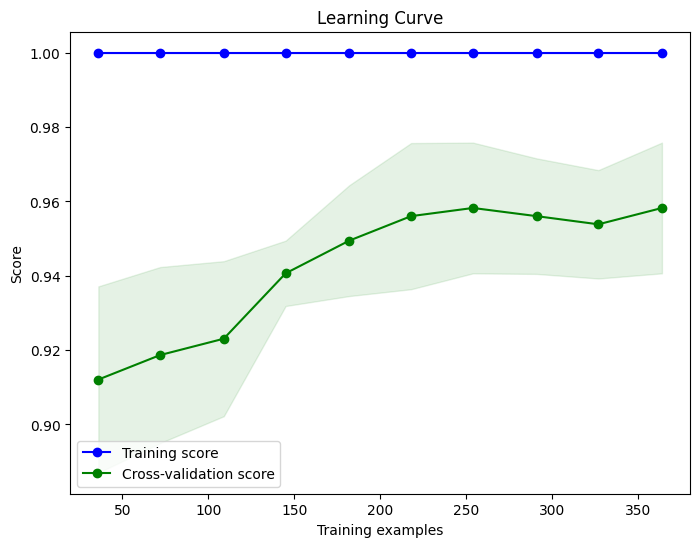

In [ ]:
from sklearn.model_selection import learning_curve

# Define a function to plot learning curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="green")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for Random Forest
plot_learning_curve(rf_model, X_train_scaled, y_train)


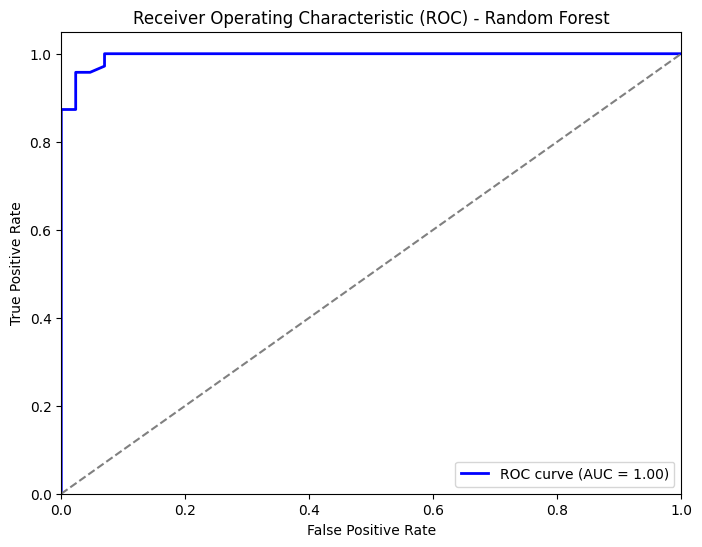

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()


# svm

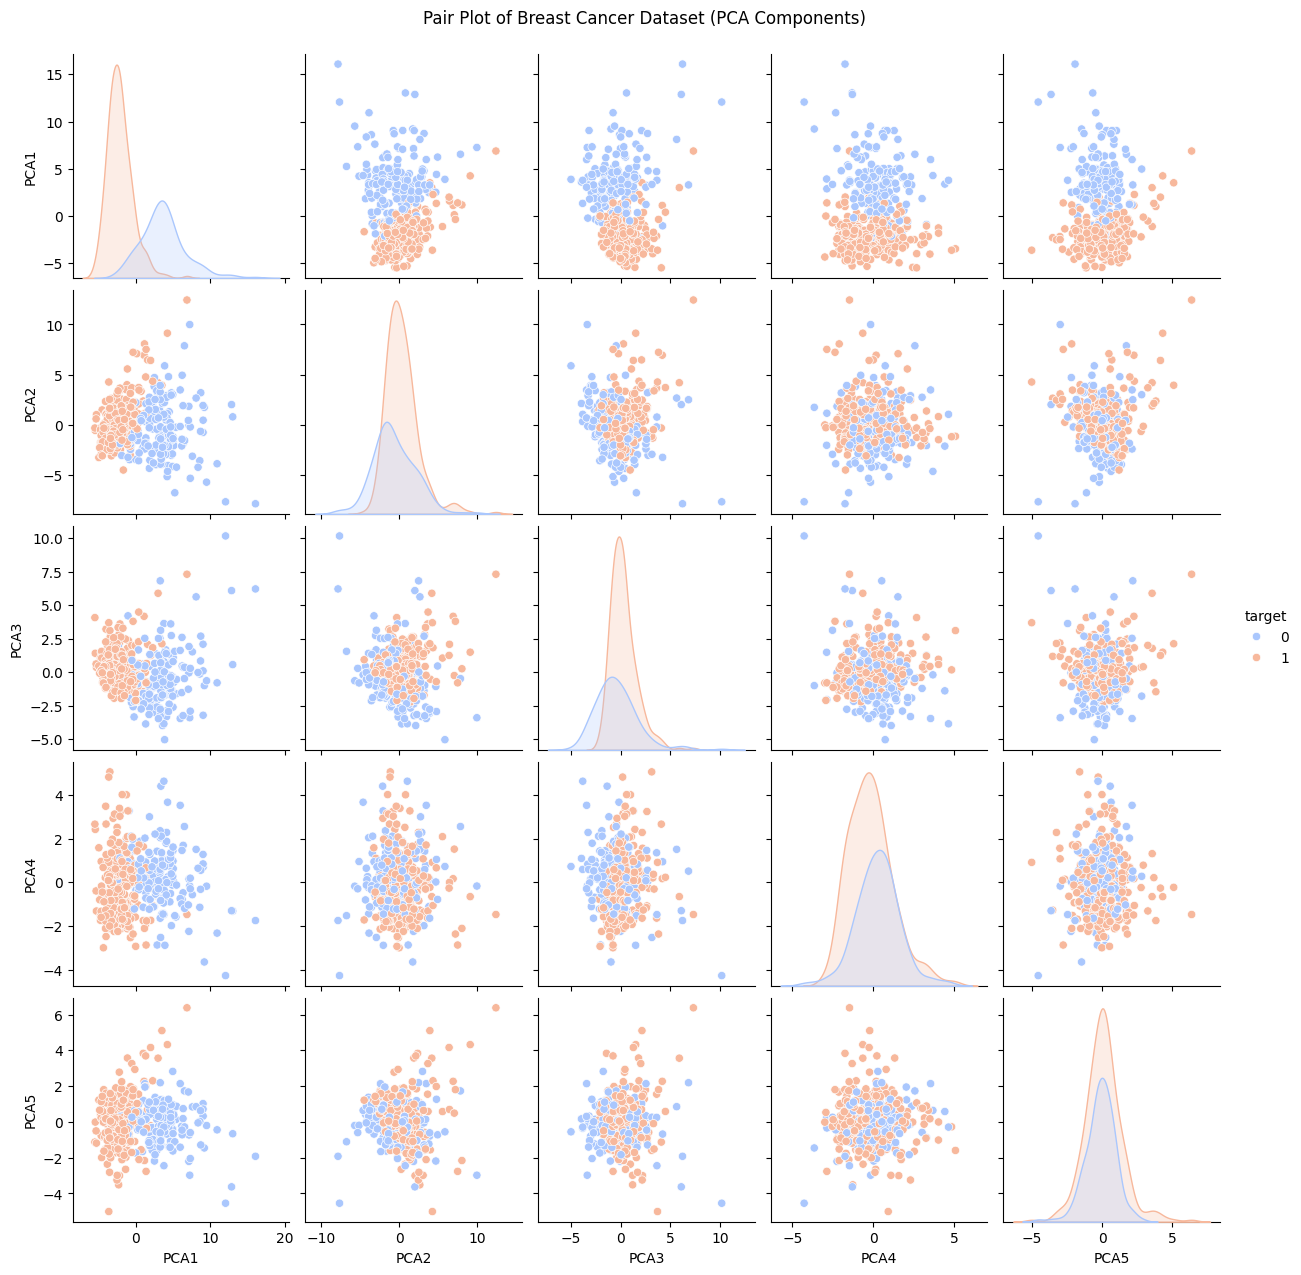

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA for dimensionality reduction
pca = PCA(n_components=5)  # Select 5 components for a more manageable pair plot
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a DataFrame for the PCA components
df_pca = pd.DataFrame(X_train_pca, columns=[f'PCA{i+1}' for i in range(X_train_pca.shape[1])])
df_pca['target'] = y_train

# Pair Plot for PCA components
sns.pairplot(df_pca, hue='target', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot of Breast Cancer Dataset (PCA Components)', y=1.02)
plt.show()


plots

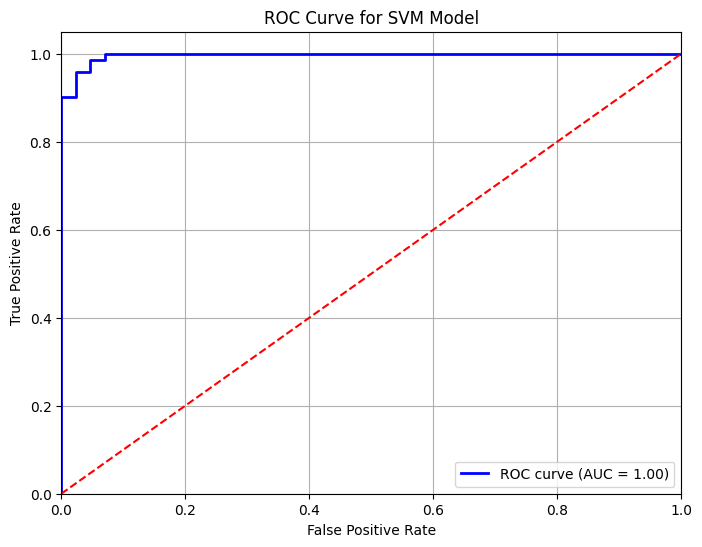

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities of the positive class
y_prob_svm = svm_classifier.decision_function(X_test_scaled)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob_svm)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


CNN

# cnn

Epoch 1/10
12/12 [==============================] - 1s 16ms/step - loss: 0.4654 - accuracy: 0.8269 - val_loss: 0.2593 - val_accuracy: 0.9341
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 0.1886 - accuracy: 0.9341 - val_loss: 0.1585 - val_accuracy: 0.9341
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 0.1154 - accuracy: 0.9615 - val_loss: 0.1337 - val_accuracy: 0.9121
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0848 - accuracy: 0.9808 - val_loss: 0.1244 - val_accuracy: 0.9231
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0703 - accuracy: 0.9835 - val_loss: 0.1165 - val_accuracy: 0.9341
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0642 - accuracy: 0.9863 - val_loss: 0.1152 - val_accuracy: 0.9341
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0587 - accuracy: 0.9835 - val_loss: 0.1140 - val_accuracy: 0.9341
Epoch 8/10
12/12 [=

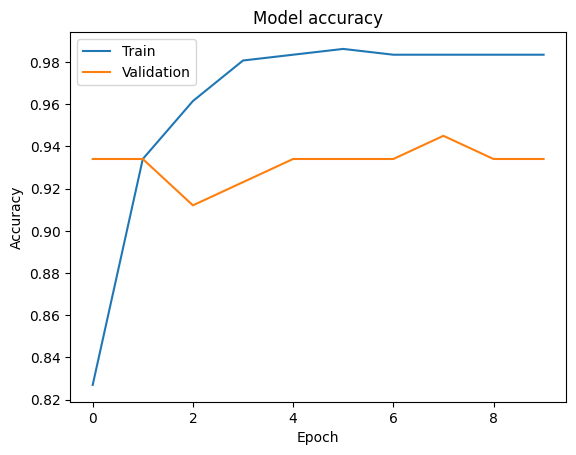

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN (samples, time steps, features)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Convert labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Build the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2 output units for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test_categorical)
print("CNN Test Accuracy: {:.2f}%".format(accuracy * 100))

# Predict on test data
y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Calculate metrics
accuracy_cnn = accuracy_score(y_test, y_pred_cnn_classes)
precision_cnn = precision_score(y_test, y_pred_cnn_classes)
recall_cnn = recall_score(y_test, y_pred_cnn_classes)
f1_cnn = f1_score(y_test, y_pred_cnn_classes)

print("CNN Test Accuracy: {:.2f}%".format(accuracy_cnn * 100))
print("CNN Precision: {:.2f}%".format(precision_cnn * 100))
print("CNN Recall: {:.2f}%".format(recall_cnn * 100))
print("CNN F1-score: {:.2f}%".format(f1_cnn * 100))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




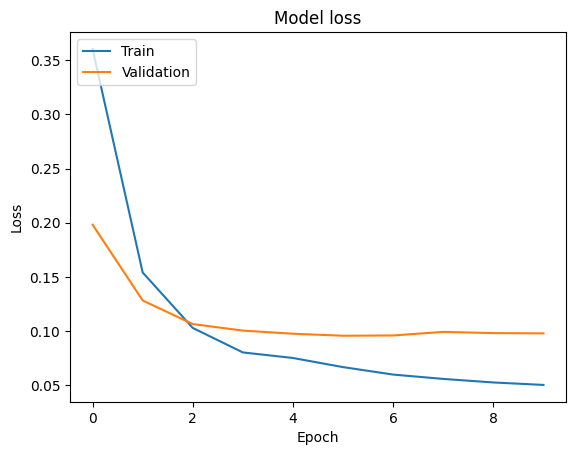

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# classical result

In [ ]:
import pandas as pd

# Define the metrics for each model
metrics = {
    "Model": ["SVM", "Random Forest", "KNN", "Neural Network"],
    "Accuracy (%)": [accuracy_svm * 100, rf_accuracy * 100, knn_accuracy * 100, accuracy * 100],
    "Precision (%)": [precision_svm * 100, rf_precision * 100, knn_precision * 100, precision * 100],
    "Recall (%)": [recall_svm * 100, rf_recall * 100, knn_recall * 100, recall * 100],
    "F1-score (%)": [f1_svm * 100, rf_f1_score * 100, knn_f1_score * 100, f1 * 100]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

# Set the model column as the index
metrics_df.set_index("Model", inplace=True)

# Print the DataFrame
print(metrics_df)
# Sort the DataFrame by accuracy
metrics_df_sorted = metrics_df.sort_values(by="Accuracy (%)", ascending=False)

# Get the best model (the one with the highest accuracy)
best_model = metrics_df_sorted.iloc[0]

# Print the best model
print("Best Model (Based on Accuracy):")
print(best_model)


                Accuracy (%)               Precision (%)    Recall (%)  \
Model                                                                    
SVM                95.614035                   97.142857     95.774648   
Random Forest      96.491228                   95.890411     98.591549   
KNN                95.614035                   93.421053         100.0   
Neural Network     96.491228  [62.28070175438597, 100.0]  [100.0, 0.0]   

                F1-score (%)  
Model                         
SVM                96.453901  
Random Forest      97.222222  
KNN                96.598639  
Neural Network     97.183099  
Best Model (Based on Accuracy):
Accuracy (%)     96.491228
Precision (%)    95.890411
Recall (%)       98.591549
F1-score (%)     97.222222
Name: Random Forest, dtype: object


# comparision of classical and quantum

In [ ]:
import pandas as pd

# Define the metrics for classical models
classical_metrics = {
    "Model": ["SVM", "Random Forest", "KNN", "Neural Network"],
    "Accuracy (%)": [accuracy_svm * 100, rf_accuracy * 100, knn_accuracy * 100, accuracy * 100],
    "Precision (%)": [precision_svm * 100, rf_precision * 100, knn_precision * 100, precision * 100],
    "Recall (%)": [recall_svm * 100, rf_recall * 100, knn_recall * 100, recall * 100],
    "F1-score (%)": [f1_svm * 100, rf_f1_score * 100, knn_f1_score * 100, f1 * 100]
}

# Define the metrics for quantum models
quantum_metrics = {
    "Model": ["VQC", "QCNN", "QSVM"],
    "Accuracy (%)": [accuracy * 100, accuracy_qcnn * 100, accuracy_qsvm * 100],
    "Precision (%)": [precision * 100, precision_qcnn * 100, precision_qsvm * 100],
    "Recall (%)": [recall * 100, recall_qcnn * 100, recall_qsvm * 100],
    "F1-score (%)": [f1 * 100, f1_qcnn * 100, f1_qsvm * 100]
}

# Create DataFrames for classical and quantum metrics
classical_df = pd.DataFrame(classical_metrics).set_index("Model").T
quantum_df = pd.DataFrame(quantum_metrics).set_index("Model").T

# Concatenate the DataFrames with a MultiIndex
combined_df = pd.concat([classical_df, quantum_df], axis=1, keys=['Classical', 'Quantum'])

# Print the combined DataFrame
print("Combined Performance Metrics for Classical and Quantum Models:")
print(combined_df)





Combined Performance Metrics for Classical and Quantum Models:
               Classical                                                       \
Model                SVM Random Forest        KNN              Neural Network   
Accuracy (%)   95.614035     96.491228  95.614035                   96.491228   
Precision (%)  97.142857     95.890411  93.421053  [62.28070175438597, 100.0]   
Recall (%)     95.774648     98.591549      100.0                [100.0, 0.0]   
F1-score (%)   96.453901     97.222222  96.598639                   97.183099   

                                  Quantum                        
Model                                 VQC       QCNN       QSVM  
Accuracy (%)                    96.491228  63.157895  67.251462  
Precision (%)  [62.28070175438597, 100.0]  63.157895  70.634921  
Recall (%)                   [100.0, 0.0]      100.0  82.407407  
F1-score (%)                    97.183099  77.419355  76.068376  


# gpu

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1
